# **Name: Varun Magotra**
# **Roll Number: 14**
# **Batch: A**


# Lab 2: Implementation of Principal Component Analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision = 3, suppress = True)
import warnings

# Load Dataset


In [ ]:
df = pd.read_csv('/content/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Data Preprocessing (Handling NA values)

In [ ]:
df = df.replace('?',np.nan)  
df.dropna(inplace=True)

In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


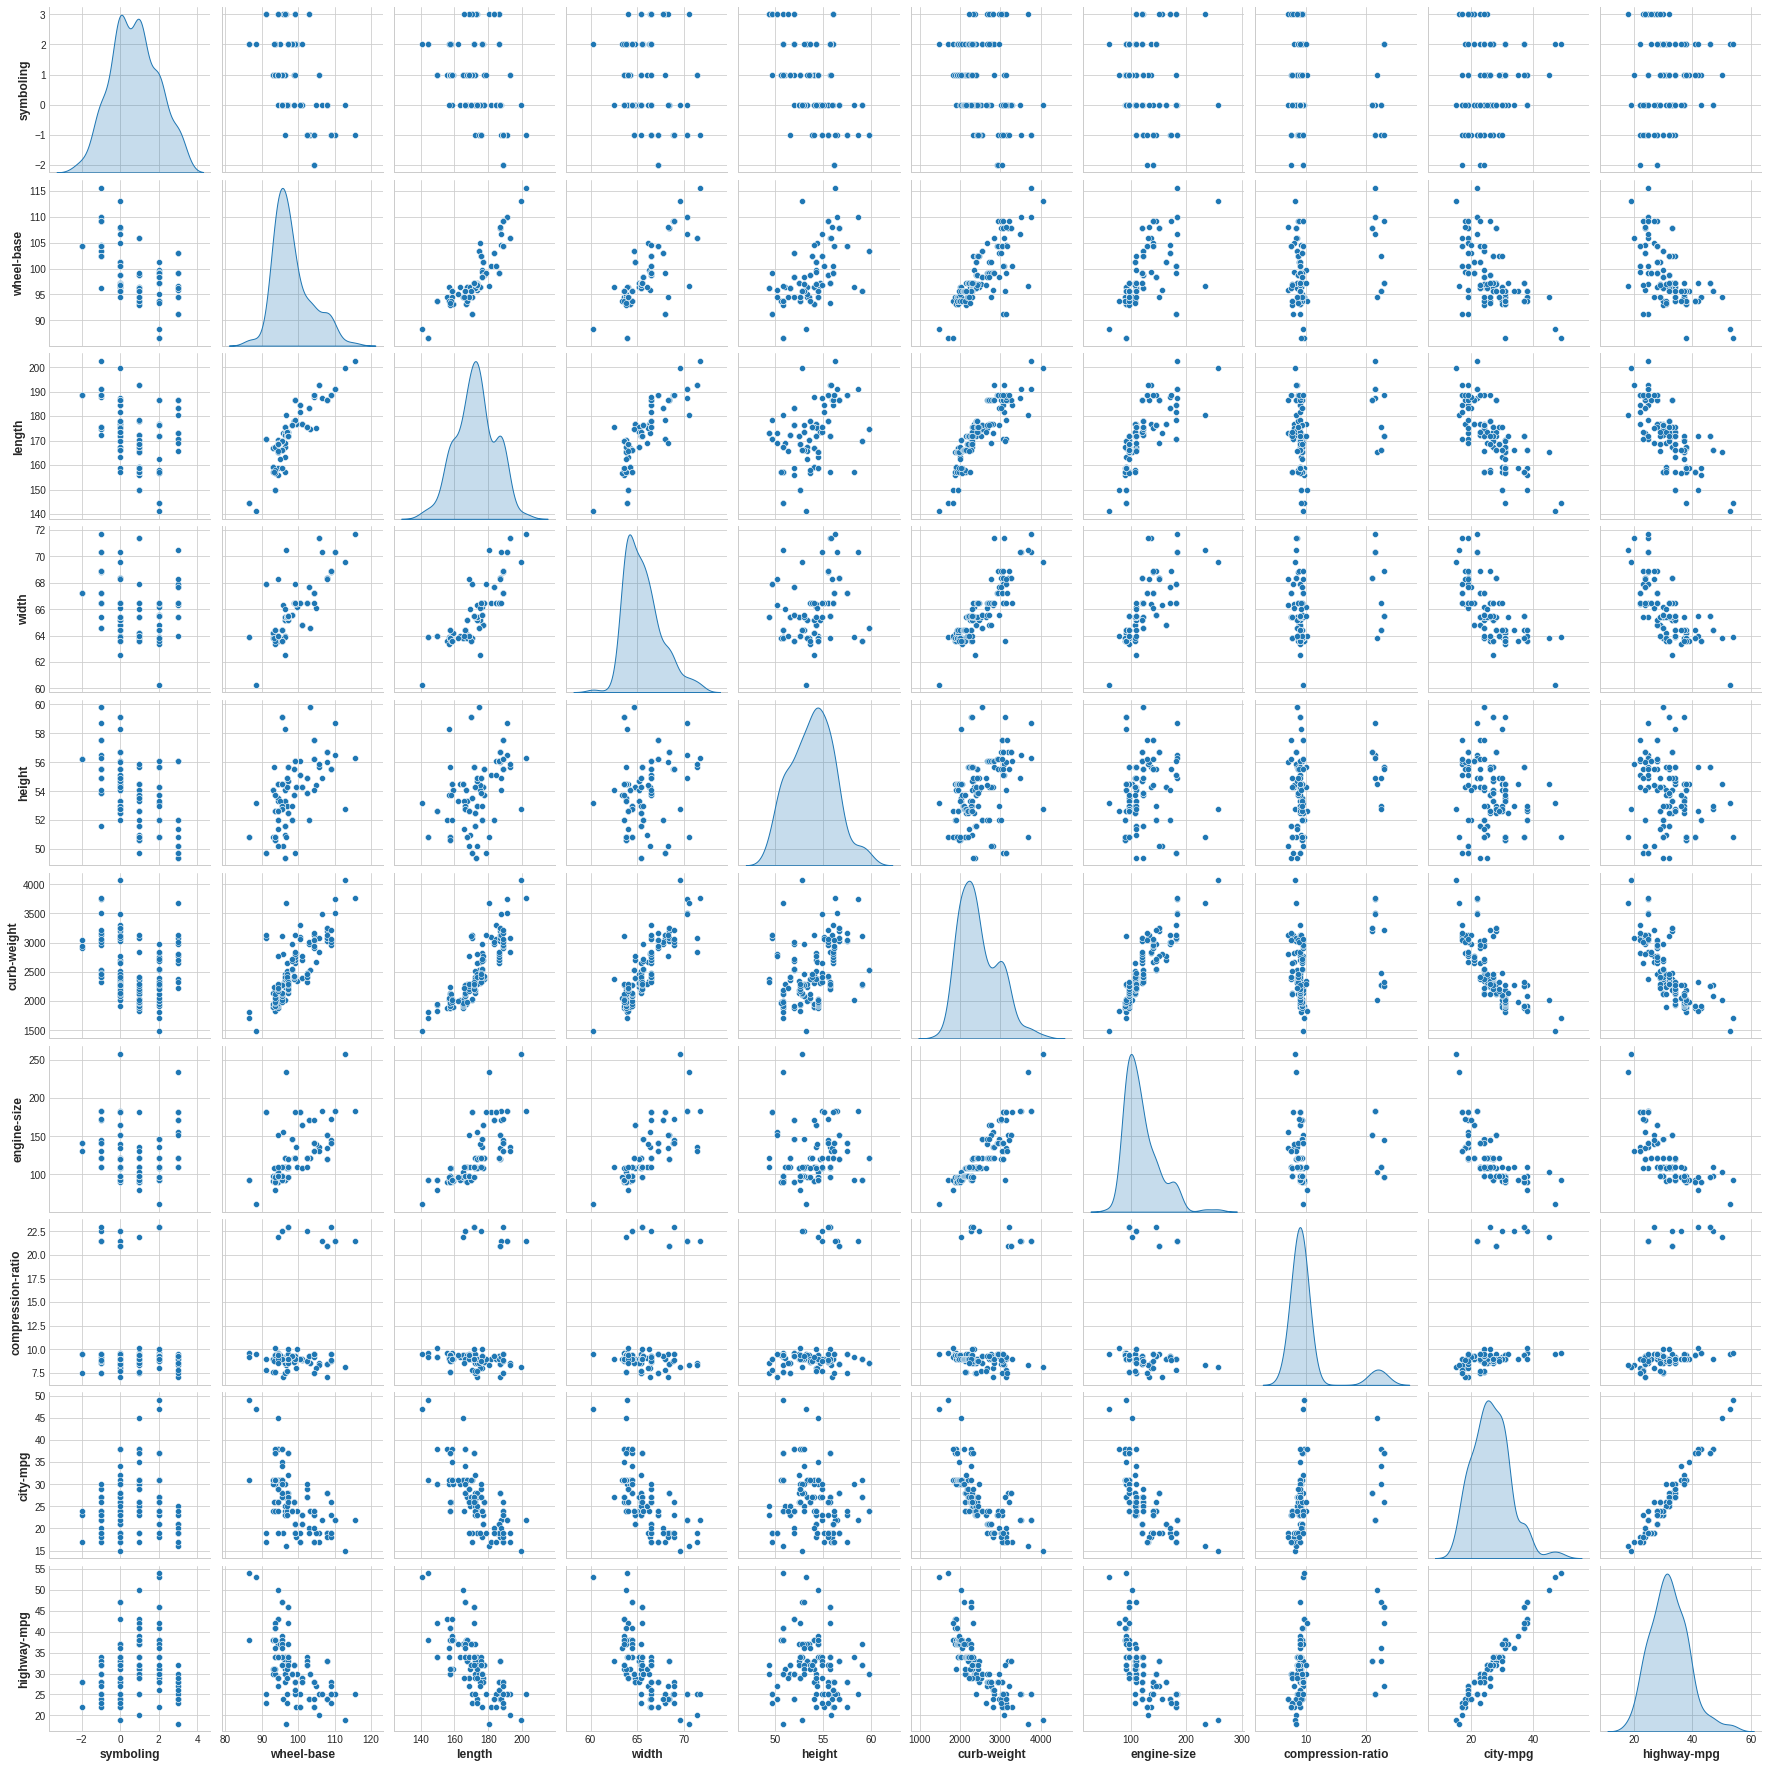

In [ ]:
attr_select = df
sns.pairplot(attr_select, diag_kind='kde')

In [ ]:
df["normalized-losses"] = df["normalized-losses"].astype("float64")
df['price'] = df["price"].astype("float64")
df['horsepower'] = df["horsepower"].astype("float64")
df['peak-rpm'] = df["peak-rpm"].astype("float64")
df['bore'] = df["bore"].astype("float64")
df['stroke'] = df["stroke"].astype("float64")

In [ ]:
categorical_columns = ["make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "num-of-cylinders", "fuel-system", "engine-type"]

In [ ]:
new_df = df.drop(columns = categorical_columns)

In [ ]:
new_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [ ]:
df.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

### Correlation Matrix

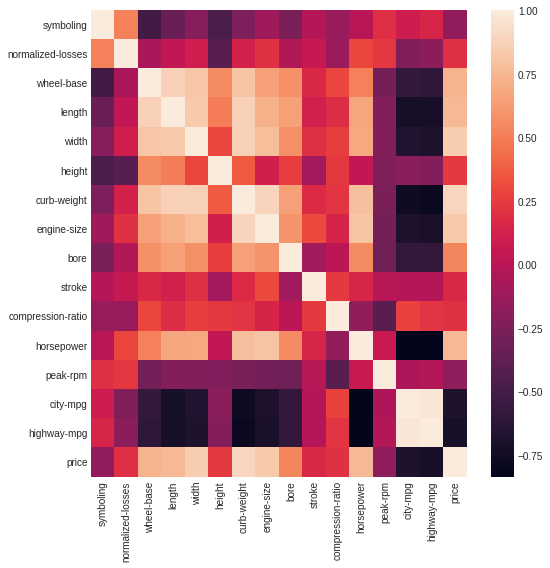

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(new_df.corr())

In [ ]:
target_data_point = new_df["price"].copy()
del new_df["price"]

### Correlation Matrix for Normalized Data

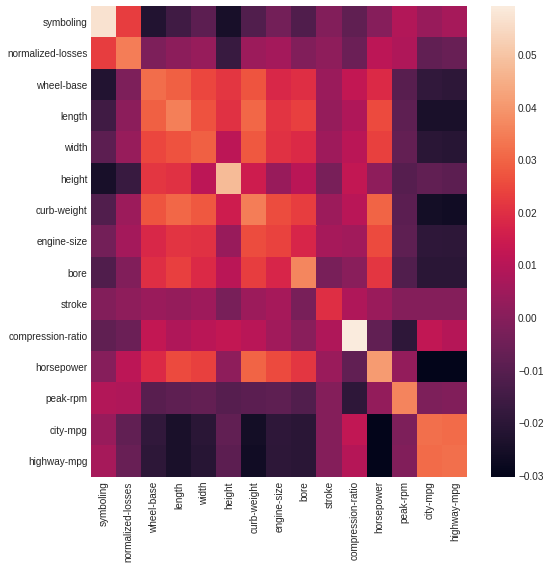

In [ ]:
normalized_df=(new_df-new_df.min())/(new_df.max()-new_df.min())
plt.figure(figsize=(8, 8))
sns.heatmap(normalized_df.cov())

In [ ]:
new_df.dtypes

symboling              int64
normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
dtype: object

## Data Partition (80% for training and 20% for testing) (Use scikit-learn)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, target_data_point, test_size=0.2, random_state=42)

**Apply PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)

In [ ]:
train_df = pd.DataFrame({"X1" : X_train_p[:,0], "X2": X_train_p[:,1], "Y": y_train})
train_df.head()

,X1,X2,Y
105,491.151411,471.079696,19699.0
179,388.722996,399.731104,15998.0
6,74.114142,544.859112,17710.0
120,-650.377723,45.499100,6229.0
68,1473.352394,110.352656,28248.0


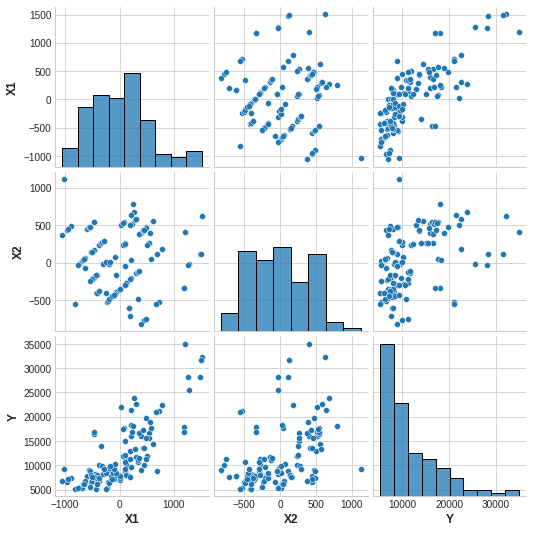

In [ ]:
sns.pairplot(train_df)

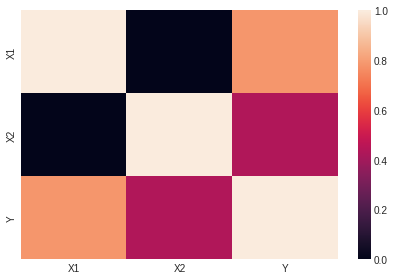

In [ ]:
sns.heatmap(train_df.corr())

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(X_train, y_train )
print("R-square score on test dataset",regr.score(X_test, y_test
                                                  ))

R-square score on test dataset 0.5453676333509228


In [ ]:
from sklearn.linear_model import LinearRegression
regrPCA = LinearRegression()
  
regrPCA.fit(X_train_p, y_train )
print("R-square score on test dataset",regrPCA.score(X_test_p, y_test
                                                  ))

R-square score on test dataset 0.7848188337579444


# **Conclusion**


1. PCA reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset.
2. It makes the training of algorithm faster by reducing the number of dimensions of the data.
3. The regression score of the model is 0.5453 for normal data.
4. The regression score of the model is 0.7848 for the PCA data which shows by reducing the dimensionality, the feature selection is done right due to which the model is able to provide better result.

